In [1]:
import os
import pandas as pd

In [2]:
!ls "../chicago/ridership"

cta-ridership-bus-routes-daily-totals-by-route.csv
cta-ridership-bus-routes-monthly-day-type-averages-totals.csv
cta-ridership-daily-boarding-totals.csv
cta-ridership-l-station-entries-daily-totals.csv


In [3]:
ridership_folder = "../chicago/ridership"
ridership_files = os.listdir(ridership_folder)
ridership_files

['cta-ridership-bus-routes-daily-totals-by-route.csv',
 'cta-ridership-bus-routes-monthly-day-type-averages-totals.csv',
 'cta-ridership-daily-boarding-totals.csv',
 'cta-ridership-l-station-entries-daily-totals.csv']

### There are 3 files containing "daily" information,can we combine these 3 files?

In [4]:
bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))
bus_daily_total.head()

/tmp/ipykernel_8762/1714229132.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[0]))


,route,date,daytype,rides
0,1,2019-06-28T00:00:00.000,W,1476
1,1,2019-06-27T00:00:00.000,W,2007
2,1,2019-06-26T00:00:00.000,W,1748
3,1,2019-06-25T00:00:00.000,W,1927
4,1,2019-06-24T00:00:00.000,W,1727


In [5]:
bus_daily_total = bus_daily_total.sort_values(by=['date']).reset_index(drop=True)
print(bus_daily_total.iloc[0,1],bus_daily_total.iloc[-1,1])

2001-01-01T00:00:00.000 2019-06-30T00:00:00.000


In [6]:
bus_daily_total.head()

,route,date,daytype,rides
0,43,2001-01-01T00:00:00.000,U,311
1,36,2001-01-01T00:00:00.000,U,7044
2,145,2001-01-01T00:00:00.000,U,1379
3,81W,2001-01-01T00:00:00.000,U,200
4,30,2001-01-01T00:00:00.000,U,600


看起來這個資料是每天的各個公車路線有多少人流 (This table shows how many rider per route per day)

In [7]:
daily_boarding = pd.read_csv(os.path.join(ridership_folder, ridership_files[2]))
daily_boarding.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01T00:00:00.000,U,297192,126455,423647
1,2001-01-02T00:00:00.000,W,780827,501952,1282779
2,2001-01-03T00:00:00.000,W,824923,536432,1361355
3,2001-01-04T00:00:00.000,W,870021,550011,1420032
4,2001-01-05T00:00:00.000,W,890426,557917,1448343


這個資料看起來是每天有多少人搭巴士、多少人搭火車、兩個加起來總共有多少人流（This table shows 3 types of rides per day, which are how many people take buses, how many people take trains, and total number of people.）

In [8]:
station_daily_total = pd.read_csv(os.path.join(ridership_folder, ridership_files[3]))
station_daily_total.head()

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,2001-01-01T00:00:00.000,U,273
1,41130,Halsted-Orange,2001-01-01T00:00:00.000,U,306
2,40760,Granville,2001-01-01T00:00:00.000,U,1059
3,40070,Jackson/Dearborn,2001-01-01T00:00:00.000,U,649
4,40090,Damen-Brown,2001-01-01T00:00:00.000,U,411


這個看起來是每個火車站每天的人流(This table shows how many rides per station per day)

#### We combine `bus_daily_total` and `station_daily_total`

In [9]:
bus_daily_total.shape, station_daily_total.shape

((824291, 4), (962546, 5))

It seems the combined data is very large, my laptop is unable to process it. So let's use 'half' of each frame. The definition of half is by the date.

In [10]:
for_time_process = bus_daily_total.copy()
for_time_process['timestamp'] = pd.to_datetime(for_time_process['date'])
for_time_process['year'] = for_time_process.timestamp.dt.year
for_time_process['month'] =  for_time_process.timestamp.dt.month
for_time_process.head()

,route,date,daytype,rides,timestamp,year,month
0,43,2001-01-01T00:00:00.000,U,311,2001-01-01,2001,1
1,36,2001-01-01T00:00:00.000,U,7044,2001-01-01,2001,1
2,145,2001-01-01T00:00:00.000,U,1379,2001-01-01,2001,1
3,81W,2001-01-01T00:00:00.000,U,200,2001-01-01,2001,1
4,30,2001-01-01T00:00:00.000,U,600,2001-01-01,2001,1


In [11]:
print(for_time_process.year.value_counts().reset_index().sort_values(by=['year']))

    year  count
13  2001  42434
10  2002  43184
9   2003  44157
5   2004  45657
4   2005  46276
3   2006  47070
0   2007  48826
1   2008  48521
2   2009  48109
6   2010  45201
7   2011  44782
8   2012  44730
11  2013  43002
16  2014  42198
14  2015  42370
12  2016  42549
15  2017  42294
17  2018  42110
18  2019  20821


#### Let's select data from 2015 to 2019

In [12]:
type(for_time_process.loc[0,'date'])

str

In [13]:
bus_daily_total['date'] = pd.to_datetime(bus_daily_total['date'])
station_daily_total['date'] = pd.to_datetime(station_daily_total['date'])

start_date, end_date = pd.to_datetime('2015-01-01'), pd.to_datetime('2019-12-31')

bus_daily_total = bus_daily_total[(bus_daily_total['date'] >= start_date) & (bus_daily_total['date'] <= end_date)].reset_index(drop=True)
station_daily_total = station_daily_total[(station_daily_total['date'] >= start_date) & (station_daily_total['date'] <= end_date)].reset_index(drop=True)

Meaning of `route` of `bus_daily_total` is the same as meaning of `station_id` of `station_daily_total`, so we'll rename the column first and then concat 2 dataframes vertically.

In [14]:
# check id overlapping
bus_ids = bus_daily_total.route.unique()
station_ids = station_daily_total.station_id.unique()
list(set(bus_ids) & set(station_ids))

[]

In [15]:
bus_daily = bus_daily_total.copy()
station_daily = station_daily_total.copy()

bus_daily = bus_daily.rename(columns={'route':'id'})
station_daily = station_daily.rename(columns={'station_id':'id'})

# add a tag, `transportation`
bus_daily['transportation'] = ['bus']*len(bus_daily)
station_daily['transportation'] = ['train']*len(station_daily)

station_daily = station_daily.drop(columns=['stationname'])

In [16]:
bus_daily.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


In [17]:
station_daily.head()

,id,date,daytype,rides,transportation
0,40570,2015-01-01,U,2344,train
1,41330,2015-01-01,U,763,train
2,40310,2015-01-01,U,1029,train
3,41010,2015-01-01,U,528,train
4,41290,2015-01-01,U,1526,train


In [18]:
bus_station_daily_total = pd.concat([bus_daily, station_daily], axis=0)
bus_station_daily_total.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


### Visually inspect the combined data

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
daily_boarding.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01T00:00:00.000,U,297192,126455,423647
1,2001-01-02T00:00:00.000,W,780827,501952,1282779
2,2001-01-03T00:00:00.000,W,824923,536432,1361355
3,2001-01-04T00:00:00.000,W,870021,550011,1420032
4,2001-01-05T00:00:00.000,W,890426,557917,1448343


#### How does ridership vary across different times of the year?

In [21]:
daily_boarding["date"] = pd.to_datetime(daily_boarding["service_date"]) 
daily_boarding["year"] = daily_boarding["date"].dt.year
daily_boarding["month"] = daily_boarding["date"].dt.month

monthly_ridership = daily_boarding.groupby(["year", "month"])["total_rides"].sum().reset_index()
monthly_ridership["month"] = monthly_ridership["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

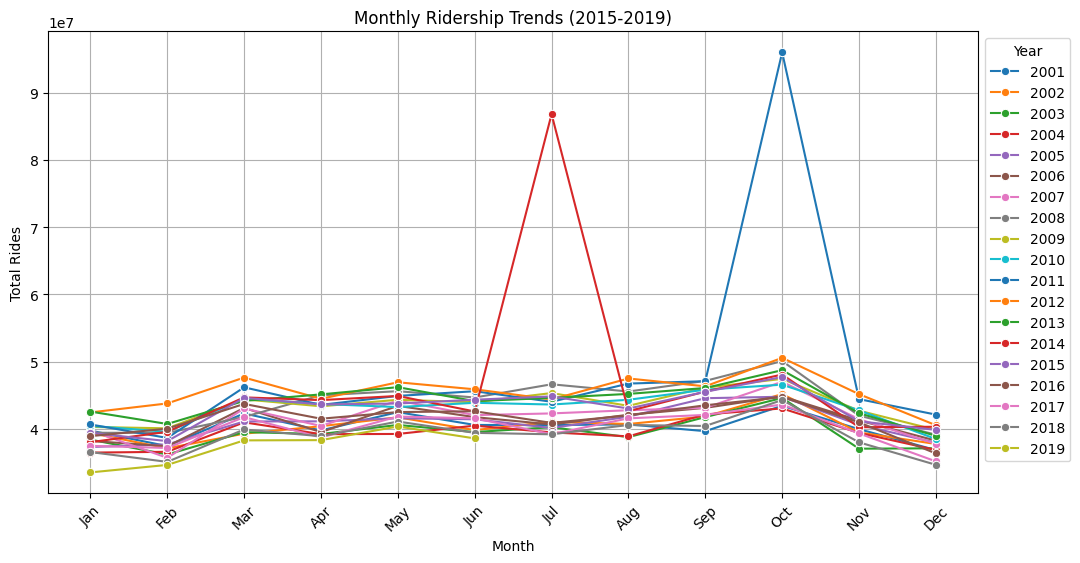

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ridership, x="month", y="total_rides", hue="year", marker="o", palette="tab10")
plt.title("Monthly Ridership Trends (2015-2019)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

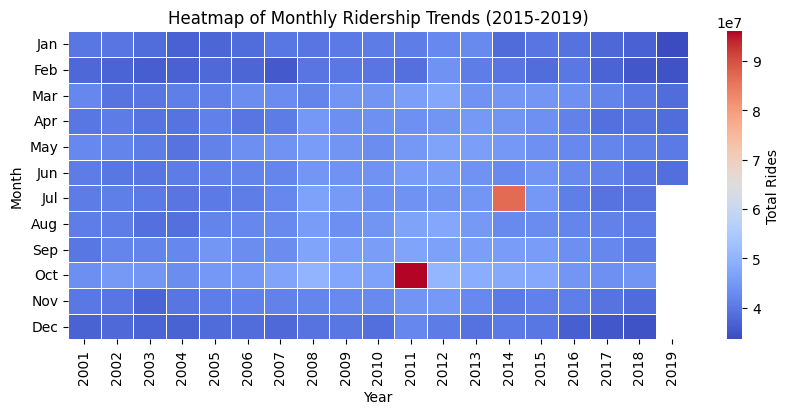

In [23]:
pivot_data = monthly_ridership.pivot(index="month", columns="year", values="total_rides")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pivot_data = pivot_data.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_data, cmap="coolwarm", fmt=".0f", linewidths=0.5, cbar_kws={"label": "Total Rides"}) # , annot=True
plt.title("Heatmap of Monthly Ridership Trends (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

#### Are there significant differences in ridership between weekdays, weekends and holidays?

In [24]:
daily_boarding.head()

,service_date,day_type,bus,rail_boardings,total_rides,date,year,month
0,2001-01-01T00:00:00.000,U,297192,126455,423647,2001-01-01,2001,1
1,2001-01-02T00:00:00.000,W,780827,501952,1282779,2001-01-02,2001,1
2,2001-01-03T00:00:00.000,W,824923,536432,1361355,2001-01-03,2001,1
3,2001-01-04T00:00:00.000,W,870021,550011,1420032,2001-01-04,2001,1
4,2001-01-05T00:00:00.000,W,890426,557917,1448343,2001-01-05,2001,1


In [25]:
daytype_mapping = {"W": "Weekday", "A": "Saturday", "U": "Sunday/Holiday"}
daily_boarding["daytype_str"] = daily_boarding["day_type"].map(daytype_mapping)

daytype_ridership = daily_boarding.groupby("daytype_str")["total_rides"].sum().reset_index()

order = ["Weekday", "Saturday", "Sunday/Holiday"]

/tmp/ipykernel_8762/2060624802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daytype_ridership, x="daytype_str", y="total_rides", order=order, palette="coolwarm")


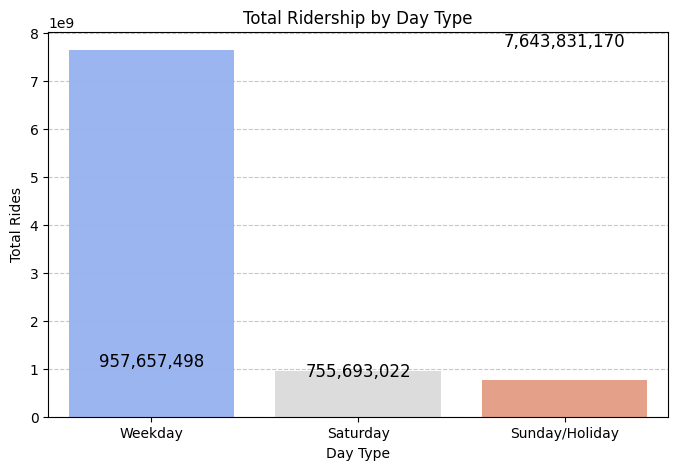

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=daytype_ridership, x="daytype_str", y="total_rides", order=order, palette="coolwarm")
plt.title("Total Ridership by Day Type")
plt.xlabel("Day Type")
plt.ylabel("Total Rides")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show values on bars
for index, value in enumerate(daytype_ridership["total_rides"]):
    plt.text(index, value, f"{value:,}", ha="center", va="bottom", fontsize=12)

plt.show()

In [27]:
weeday_total_rides = daily_boarding[daily_boarding['day_type']=='W'].reset_index(drop=True)
weeday_monthly_ridership = weeday_total_rides.groupby(["year", "month"])["total_rides"].sum().reset_index()
weeday_monthly_ridership["month"] = weeday_monthly_ridership["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

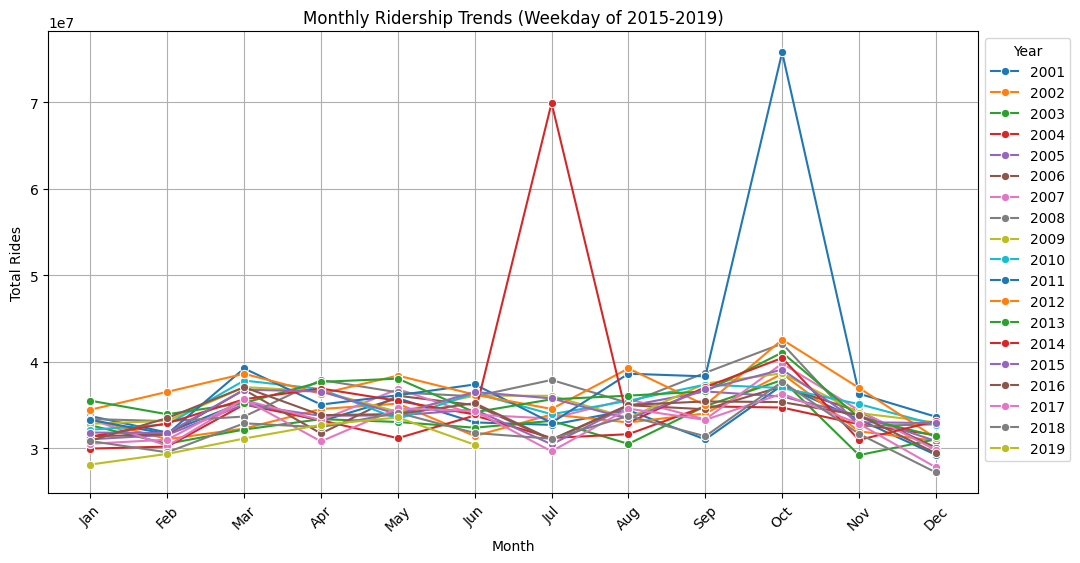

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weeday_monthly_ridership, x="month", y="total_rides", hue="year", marker="o", palette="tab10")
plt.title("Monthly Ridership Trends (Weekday of 2015-2019)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

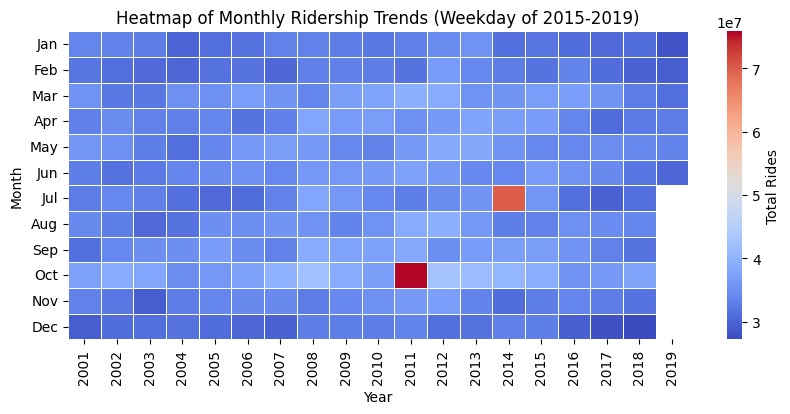

In [29]:
weeday_pivot_data = weeday_monthly_ridership.pivot(index="month", columns="year", values="total_rides")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
weeday_pivot_data = weeday_pivot_data.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(weeday_pivot_data, cmap="coolwarm", fmt=".0f", linewidths=0.5, cbar_kws={"label": "Total Rides"}) # , annot=True
plt.title("Heatmap of Monthly Ridership Trends (Weekday of 2015-2019)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

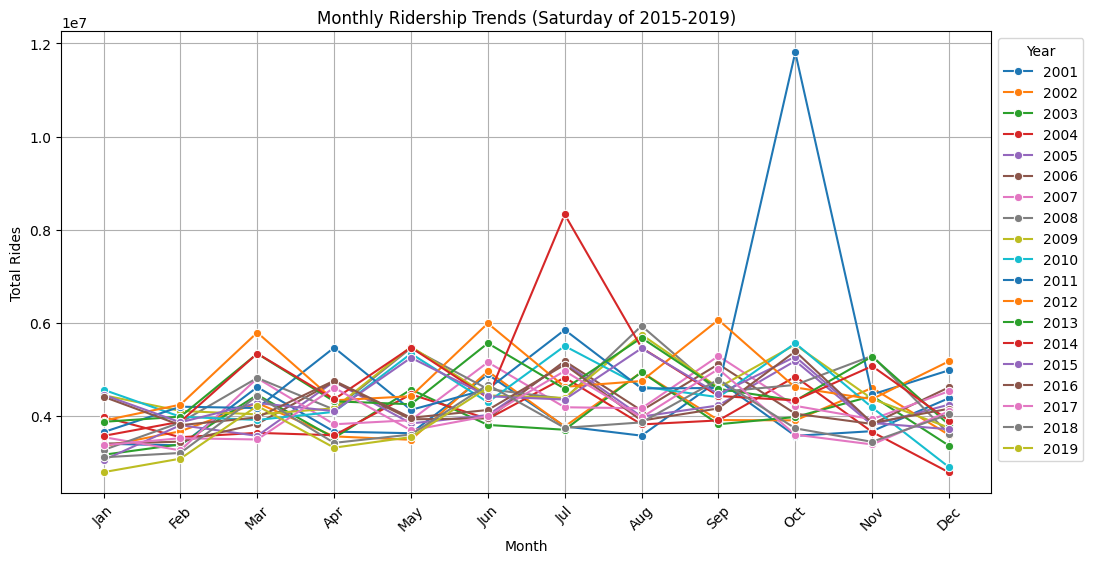

In [31]:
sat_total_rides = daily_boarding[daily_boarding['day_type']=='A'].reset_index(drop=True)
sat_monthly_ridership = sat_total_rides.groupby(["year", "month"])["total_rides"].sum().reset_index()
sat_monthly_ridership["month"] = sat_monthly_ridership["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

plt.figure(figsize=(12, 6))
sns.lineplot(data=sat_monthly_ridership, x="month", y="total_rides", hue="year", marker="o", palette="tab10")
plt.title("Monthly Ridership Trends (Saturday of 2015-2019)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

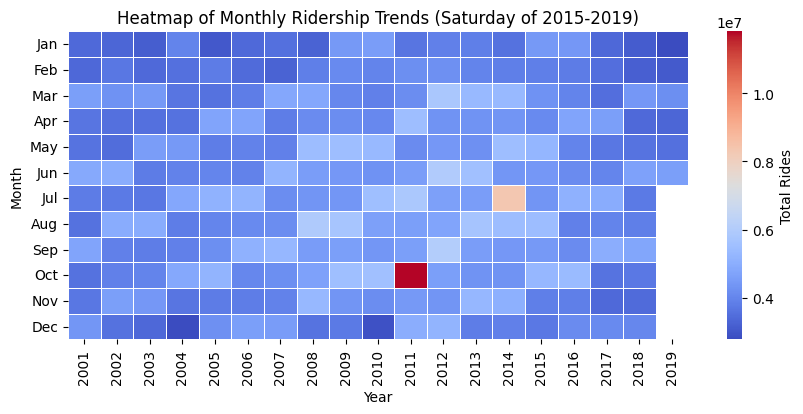

In [32]:
sat_pivot_data = sat_monthly_ridership.pivot(index="month", columns="year", values="total_rides")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sat_pivot_data = sat_pivot_data.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(sat_pivot_data, cmap="coolwarm", fmt=".0f", linewidths=0.5, cbar_kws={"label": "Total Rides"}) # , annot=True
plt.title("Heatmap of Monthly Ridership Trends (Saturday of 2015-2019)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

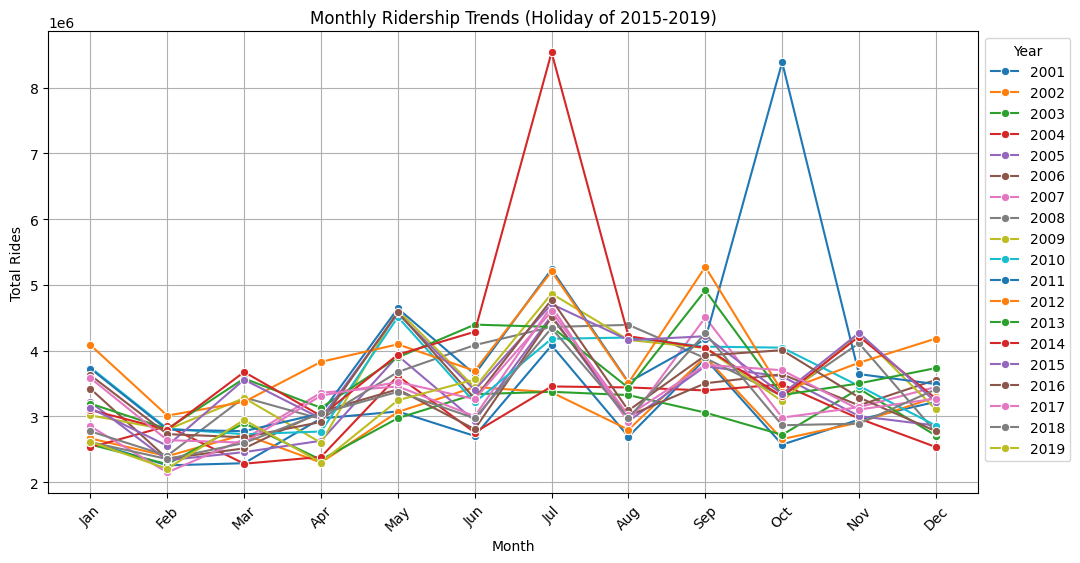

In [33]:
holi_total_rides = daily_boarding[daily_boarding['day_type']=='U'].reset_index(drop=True)
holi_monthly_ridership = holi_total_rides.groupby(["year", "month"])["total_rides"].sum().reset_index()
holi_monthly_ridership["month"] = holi_monthly_ridership["month"].apply(lambda x: pd.to_datetime(str(x), format="%m").strftime("%b"))

plt.figure(figsize=(12, 6))
sns.lineplot(data=holi_monthly_ridership, x="month", y="total_rides", hue="year", marker="o", palette="tab10")
plt.title("Monthly Ridership Trends (Holiday of 2015-2019)")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

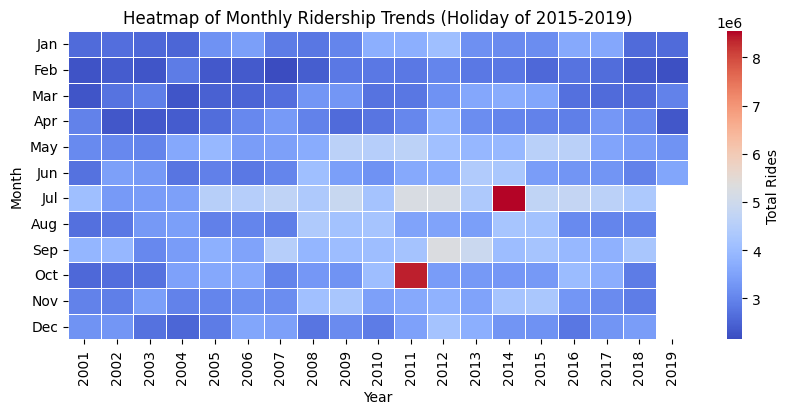

In [34]:
holi_pivot_data = holi_monthly_ridership.pivot(index="month", columns="year", values="total_rides")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
holi_pivot_data = holi_pivot_data.reindex(month_order)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(holi_pivot_data, cmap="coolwarm", fmt=".0f", linewidths=0.5, cbar_kws={"label": "Total Rides"}) # , annot=True
plt.title("Heatmap of Monthly Ridership Trends (Holiday of 2015-2019)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

#### How does bus ridership compare to train ridership over time?

In [35]:
bus_station_daily_total.head()

,id,date,daytype,rides,transportation
0,172,2015-01-01,U,123,bus
1,79,2015-01-01,U,13392,bus
2,71,2015-01-01,U,4460,bus
3,56,2015-01-01,U,2501,bus
4,54B,2015-01-01,U,1274,bus


In [36]:
bus_station_daily_total["year"] = bus_station_daily_total["date"].dt.year
bus_station_daily_total["month"] = bus_station_daily_total["date"].dt.month
bus_station_daily_total.head()

,id,date,daytype,rides,transportation,year,month
0,172,2015-01-01,U,123,bus,2015,1
1,79,2015-01-01,U,13392,bus,2015,1
2,71,2015-01-01,U,4460,bus,2015,1
3,56,2015-01-01,U,2501,bus,2015,1
4,54B,2015-01-01,U,1274,bus,2015,1


In [37]:
# create id-transportation mapping dictionary
df_mapping = bus_station_daily_total[['id', 'transportation']].drop_duplicates()
mapping_dict = dict(zip(df_mapping['id'], df_mapping['transportation']))

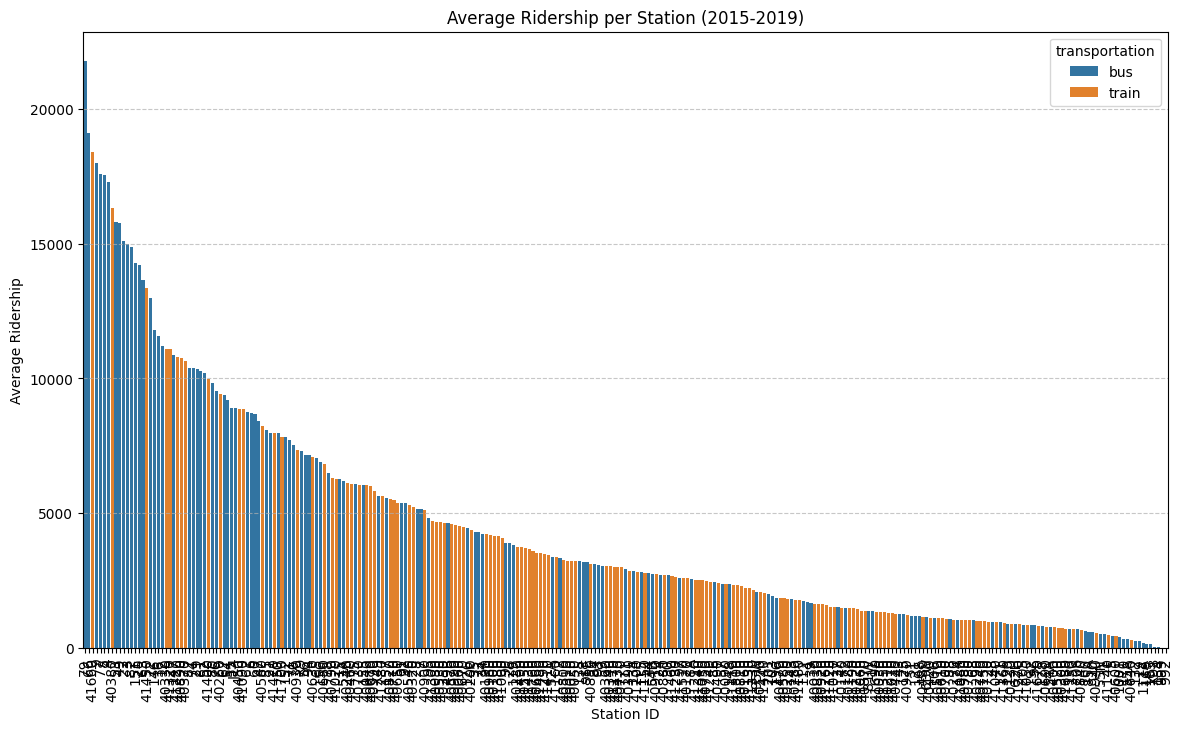

In [38]:
# Aggregate ridership by station (id) and year
station_ridership = bus_station_daily_total.groupby(["id", "year"])["rides"].mean().reset_index()

# Aggregate by station to get the overall average ridership
# more todo: detect peak (outlier) before mean()
station_ridership_avg = station_ridership.groupby("id")["rides"].mean().reset_index()
station_ridership_avg['transportation'] = station_ridership_avg['id'].apply(lambda x:mapping_dict[x])

# Sort stations by average ridership
station_ridership_avg_sorted = station_ridership_avg.sort_values(by="rides", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=station_ridership_avg_sorted, x="id", y="rides", hue='transportation') # palette="coolwarm"
plt.title("Average Ridership per Station (2015-2019)")
plt.xlabel("Station ID")
plt.ylabel("Average Ridership")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis="y", linestyle="--", alpha=0.7)

# # Show values on bars
# for index, value in enumerate(station_ridership_avg_sorted["rides"]):
#     plt.text(index, value, f"{value:,.0f}", ha="center", va="bottom", fontsize=10)

plt.show()